Test data shape: (12000, 3072)
Test labels shape: (12000, 10)
375/375 - 1s - 4ms/step - accuracy: 0.7360 - loss: 0.8634
测试集损失: 0.8634073138237
测试集准确率: 0.7360000014305115
375/375 - 1s - 3ms/step - accuracy: 0.7360 - loss: 0.8634

Test accuracy: 0.7360000014305115
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.29      0.26      0.28      1200
           1       0.98      1.00      0.99      1200
           2       0.97      0.98      0.98      1200
           3       0.95      0.95      0.95      1200
           4       1.00      1.00      1.00      1200
           5       1.00      0.10      0.17      1200
           6       0.49      0.96      0.65      1200
           7       1.00      1.00      1.00      1200
           8       0.58      0.41      0.48      1200
           9       0.55      0.70      0.61      1200

    accuracy                           0.74     12000
   macro avg       0.78      0.74      0.71   

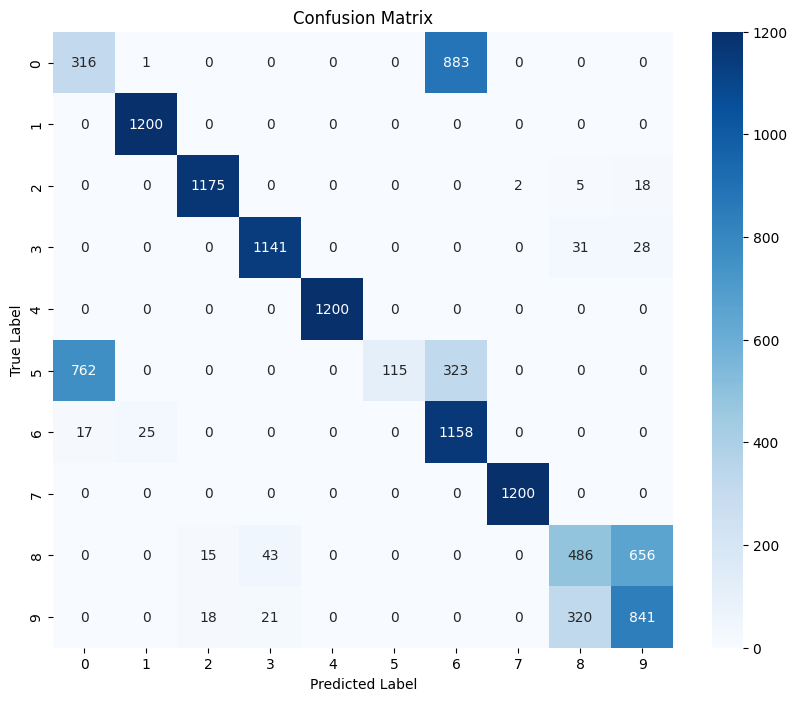

In [1]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 0s - 6ms/step - accuracy: 0.7415 - loss: 0.7721
测试集损失: 0.7720981240272522
测试集准确率: 0.7415000200271606
63/63 - 0s - 4ms/step - accuracy: 0.7415 - loss: 0.7721

Test accuracy: 0.7415000200271606
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.46      0.59      0.52       200
           1       0.96      1.00      0.98       200
           2       0.90      0.89      0.89       200
           3       0.76      0.82      0.79       200
           4       1.00      1.00      1.00       200
           5       1.00      0.30      0.46       200
           6       0.64      0.88      0.74       200
           7       1.00      1.00      1.00       200
           8       0.48      0.34      0.39       200
           9       0.49      0.60      0.54       200

    accuracy                           0.74      2000
   macro avg       0.77      0.74      0.73      20

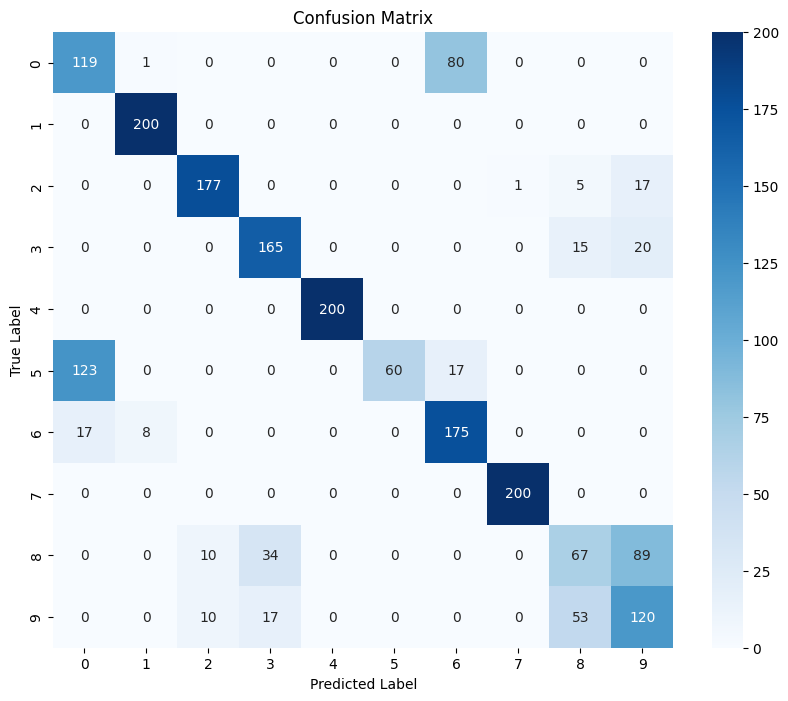

In [2]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_5'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 0s - 6ms/step - accuracy: 0.7340 - loss: 0.8357
测试集损失: 0.8357369899749756
测试集准确率: 0.734000027179718
63/63 - 0s - 4ms/step - accuracy: 0.7340 - loss: 0.8357

Test accuracy: 0.734000027179718
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       200
           1       1.00      1.00      1.00       200
           2       0.98      0.99      0.99       200
           3       0.94      0.94      0.94       200
           4       1.00      1.00      1.00       200
           5       1.00      0.10      0.17       200
           6       0.52      0.99      0.68       200
           7       1.00      1.00      1.00       200
           8       0.52      0.36      0.43       200
           9       0.51      0.65      0.57       200

    accuracy                           0.73      2000
   macro avg       0.78      0.73      0.71      2000

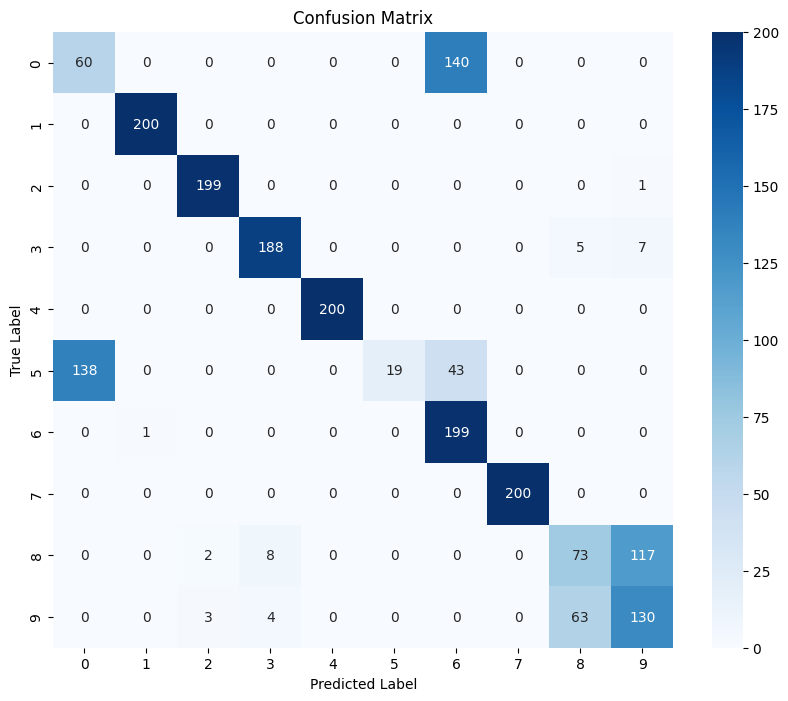

In [3]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_10'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 0s - 6ms/step - accuracy: 0.7305 - loss: 0.8668
测试集损失: 0.8667989373207092
测试集准确率: 0.7304999828338623
63/63 - 0s - 4ms/step - accuracy: 0.7305 - loss: 0.8668

Test accuracy: 0.7304999828338623
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.22      0.18      0.20       200
           1       0.98      1.00      0.99       200
           2       0.99      1.00      0.99       200
           3       1.00      0.97      0.99       200
           4       1.00      1.00      1.00       200
           5       1.00      0.07      0.13       200
           6       0.47      0.97      0.64       200
           7       1.00      1.00      1.00       200
           8       0.56      0.42      0.48       200
           9       0.54      0.68      0.60       200

    accuracy                           0.73      2000
   macro avg       0.78      0.73      0.70      20

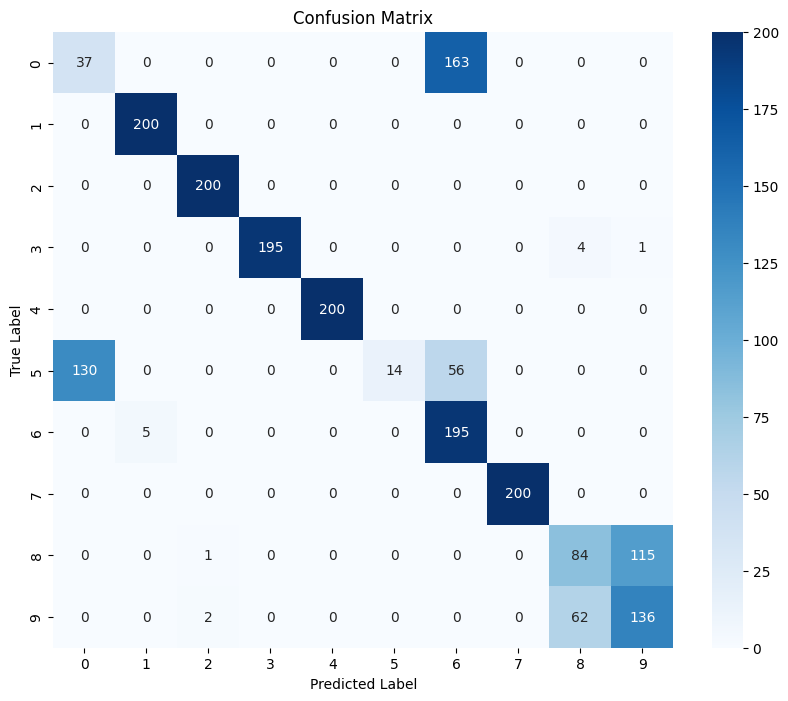

In [4]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_15'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 0s - 6ms/step - accuracy: 0.7395 - loss: 0.8889
测试集损失: 0.8888617157936096
测试集准确率: 0.7394999861717224
63/63 - 0s - 4ms/step - accuracy: 0.7395 - loss: 0.8889

Test accuracy: 0.7394999861717224
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.25      0.20      0.23       200
           1       0.98      1.00      0.99       200
           2       0.99      1.00      1.00       200
           3       0.99      0.98      0.99       200
           4       1.00      1.00      1.00       200
           5       1.00      0.04      0.08       200
           6       0.46      0.98      0.63       200
           7       1.00      1.00      1.00       200
           8       0.62      0.45      0.52       200
           9       0.58      0.74      0.65       200

    accuracy                           0.74      2000
   macro avg       0.79      0.74      0.71      20

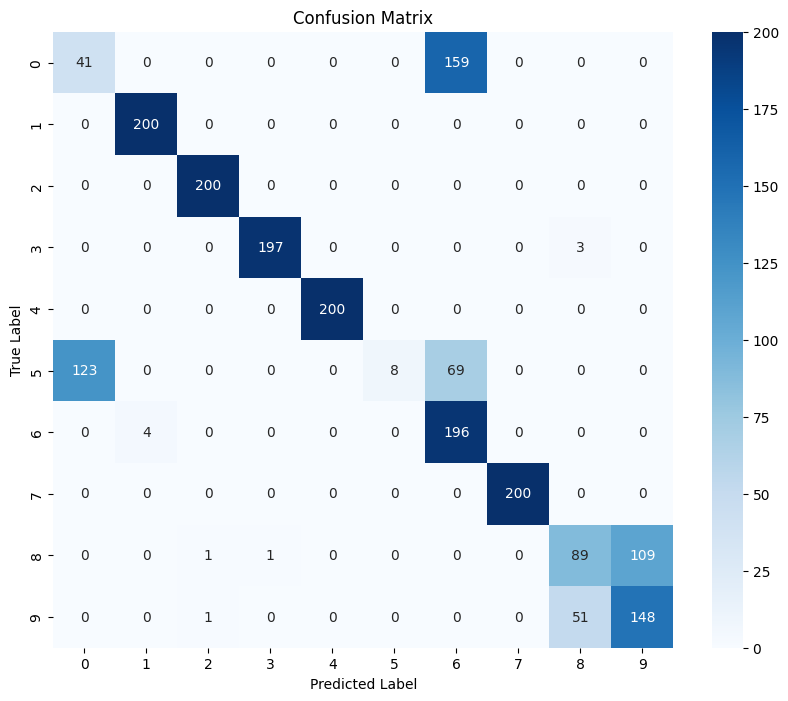

In [5]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_20'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 0s - 6ms/step - accuracy: 0.7335 - loss: 0.9071
测试集损失: 0.9071350693702698
测试集准确率: 0.7335000038146973
63/63 - 0s - 4ms/step - accuracy: 0.7335 - loss: 0.9071

Test accuracy: 0.7335000038146973
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.18      0.14      0.16       200
           1       0.99      1.00      0.99       200
           2       0.99      0.99      0.99       200
           3       1.00      0.99      0.99       200
           4       1.00      1.00      1.00       200
           5       1.00      0.04      0.07       200
           6       0.45      0.98      0.62       200
           7       1.00      1.00      1.00       200
           8       0.64      0.43      0.52       200
           9       0.57      0.76      0.65       200

    accuracy                           0.73      2000
   macro avg       0.78      0.73      0.70      20

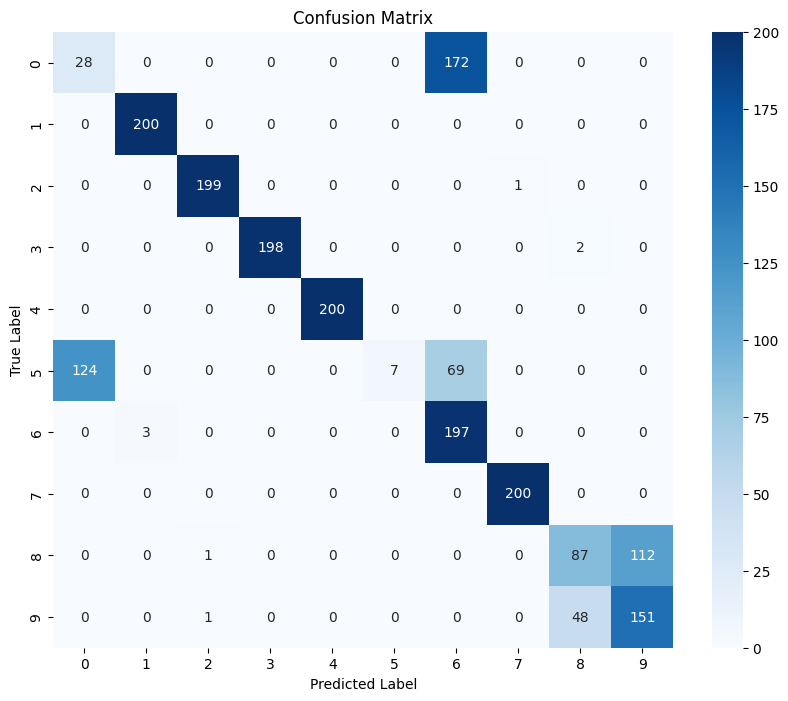

In [6]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_25'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 0s - 6ms/step - accuracy: 0.7370 - loss: 0.9058
测试集损失: 0.905772864818573
测试集准确率: 0.7369999885559082
63/63 - 0s - 4ms/step - accuracy: 0.7370 - loss: 0.9058

Test accuracy: 0.7369999885559082
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.20      0.15      0.17       200
           1       0.98      1.00      0.99       200
           2       1.00      1.00      1.00       200
           3       1.00      0.99      0.99       200
           4       1.00      1.00      1.00       200
           5       1.00      0.04      0.07       200
           6       0.45      0.98      0.62       200
           7       1.00      1.00      1.00       200
           8       0.66      0.43      0.52       200
           9       0.58      0.78      0.66       200

    accuracy                           0.74      2000
   macro avg       0.79      0.74      0.70      200

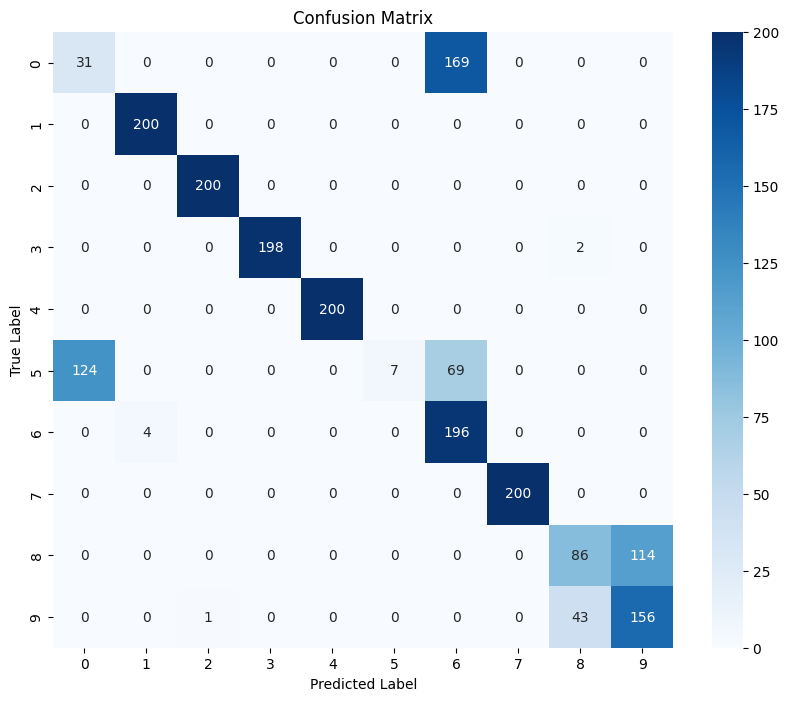

In [7]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_30'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/mobilenet0402-3-smallerrrr.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

